In [1]:
import tensorflow as tf
from tensorflow import keras
from sklearn.manifold import TSNE
from tensorflow.keras.datasets import mnist
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D
from tensorflow.keras.layers import Dense, Activation, Flatten

In [2]:
from keras.datasets import cifar100
(train_X, train_y), (test_X, test_y) = cifar100.load_data()

169001437/169001437 [==============================] - 11s 0us/step


In [3]:
lenet_model = Sequential()
lenet_model.add(Conv2D(filters=6, kernel_size=(5, 5), activation='relu', input_shape=(32,32,3)))
lenet_model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
lenet_model.add(Conv2D(filters=16, kernel_size=(5, 5), activation='relu'))
lenet_model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
lenet_model.add(Flatten())
lenet_model.add(Dense(units=120, activation='relu'))
lenet_model.add(Dense(units=84, activation='relu'))
lenet_model.add(Dense(units=100, activation = 'softmax'))

In [4]:
train_y = tf.keras.utils.to_categorical(train_y, num_classes=100)
test_y = tf.keras.utils.to_categorical(test_y, num_classes=100)

In [5]:
from sklearn.model_selection import train_test_split
train_X, X_val, train_y, y_val = train_test_split(train_X, train_y, test_size=0.2, random_state=1)

In [6]:
hist=[]
results=[]

In [7]:
from keras.optimizers import SGD,Adam

opt_list=[SGD(lr=0.01),Adam(lr=0.001)]
epochs_list = [10,20,30]
for optimizer in  opt_list:
  for epoch in epochs_list:

    lenet_model.compile(optimizer=optimizer, loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])
    history = lenet_model.fit(
      train_X,
      train_y,
      batch_size=64,
      epochs=epoch,
      validation_data=(X_val, y_val)
    )
    hist.append(history.history)
    results.append(lenet_model.evaluate(test_X, test_y, batch_size=128))

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)
/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/10
625/625 [==============================] - 43s 67ms/step - loss: 4.7119 - accuracy: 0.0096 - val_loss: 4.6056 - val_accuracy: 0.0061
Epoch 2/10
625/625 [==============================] - 41s 65ms/step - loss: 4.6052 - accuracy: 0.0104 - val_loss: 4.6057 - val_accuracy: 0.0060
Epoch 3/10
625/625 [==============================] - 43s 69ms/step - loss: 4.6051 - accuracy: 0.0104 - val_loss: 4.6057 - val_accuracy: 0.0060
Epoch 4/10
625/625 [==============================] - 41s 66ms/step - loss: 4.6051 - accuracy: 0.0105 - val_loss: 4.6058 - val_accuracy: 0.0062
Epoch 5/10
625/625 [==============================] - 42s 67ms/step - loss: 4.6050 - accuracy: 0.0105 - val_loss: 4.6059 - val_accuracy: 0.0062
Epoch 6/10
625/625 [==============================] - 45s 72ms/step - loss: 4.6050 - accuracy: 0.0105 - val_loss: 4.6059 - val_accuracy: 0.0062
Epoch 7/10
625/625 [==============================] - 42s 67ms/step - loss: 4.6049 - accuracy: 0.0105 - val_loss: 4.6060 - val_accuracy:

In [8]:
hist

[{'loss': [4.711878299713135,
   4.605210781097412,
   4.605144500732422,
   4.60507869720459,
   4.605032920837402,
   4.604986667633057,
   4.604940414428711,
   4.604877948760986,
   4.604820728302002,
   4.604753017425537],
  'accuracy': [0.009575000032782555,
   0.010350000113248825,
   0.010350000113248825,
   0.010475000366568565,
   0.010475000366568565,
   0.010525000281631947,
   0.01054999977350235,
   0.010525000281631947,
   0.010499999858438969,
   0.010525000281631947],
  'val_loss': [4.605616569519043,
   4.605651378631592,
   4.6057047843933105,
   4.605783462524414,
   4.605868816375732,
   4.605947017669678,
   4.606028079986572,
   4.606107234954834,
   4.606161117553711,
   4.606218338012695],
  'val_accuracy': [0.006099999882280827,
   0.006000000052154064,
   0.006000000052154064,
   0.006200000178068876,
   0.006200000178068876,
   0.006200000178068876,
   0.006300000008195639,
   0.006300000008195639,
   0.006300000008195639,
   0.006300000008195639]},
 {'loss'

In [9]:
results

[[4.6050591468811035, 0.00989999994635582],
 [4.502528190612793, 0.025800000876188278],
 [3.8747034072875977, 0.1273999959230423],
 [3.6849679946899414, 0.17710000276565552],
 [4.388747692108154, 0.15760000050067902],
 [5.252329349517822, 0.15070000290870667]]

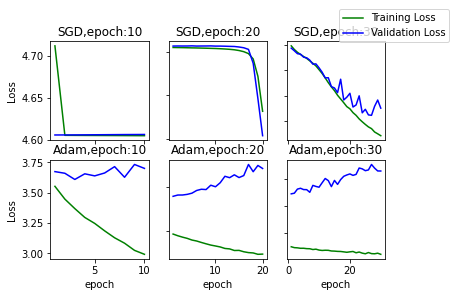

In [10]:
fig, axs = plt.subplots(2, 3)
epoch1=range(1,11)
epoch2 = range(1,21)
epoch3 = range(1,31)


axs[0, 0].set_title('SGD,epoch:10')
axs[0, 0].plot(epoch1,hist[0]['loss'],color="green",label="Training Loss")
axs[0, 0].plot(epoch1,hist[0]['val_loss'],color="blue",label = "Validation Loss")

axs[0, 1].set_title('SGD,epoch:20')
axs[0, 1].plot(epoch2,hist[1]['loss'],color="green")
axs[0, 1].plot(epoch2,hist[1]['val_loss'],color="blue")

axs[0, 2].set_title('SGD,epoch:30')
axs[0, 2].plot(epoch3,hist[2]['loss'],color="green")
axs[0, 2].plot(epoch3,hist[2]['val_loss'],color="blue")

axs[1, 0].set_title('Adam,epoch:10')
axs[1, 0].plot(epoch1,hist[3]['loss'],color="green")
axs[1, 0].plot(epoch1,hist[3]['val_loss'],color="blue")

axs[1, 1].set_title('Adam,epoch:20')
axs[1, 1].plot(epoch2,hist[4]['loss'],color="green")
axs[1, 1].plot(epoch2,hist[4]['val_loss'],color="blue")


axs[1, 2].set_title('Adam,epoch:30')
axs[1, 2].plot(epoch3,hist[5]['loss'],color="green")
axs[1, 2].plot(epoch3,hist[5]['val_loss'],color="blue")
  

for ax in axs.flat:
    ax.set(xlabel='epoch', ylabel='Loss')

fig.legend(bbox_to_anchor=(1.04, 1), borderaxespad=0)


# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

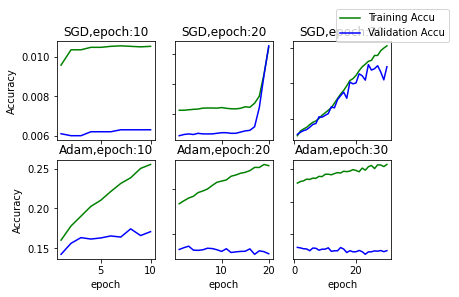

In [11]:
fig, axs = plt.subplots(2, 3)
epoch1=range(1,11)
epoch2 = range(1,21)
epoch3 = range(1,31)

axs[0, 0].set_title('SGD,epoch:10')
axs[0, 0].plot(epoch1,hist[0]['accuracy'],color="green",label="Training Accu")
axs[0, 0].plot(epoch1,hist[0]['val_accuracy'],color="blue",label = "Validation Accu")

axs[0, 1].set_title('SGD,epoch:20' )
axs[0, 1].plot(epoch2,hist[1]['accuracy'],color="green")
axs[0, 1].plot(epoch2,hist[1]['val_accuracy'],color="blue")

axs[0, 2].set_title('SGD,epoch:30')
axs[0, 2].plot(epoch3,hist[2]['accuracy'],color="green")
axs[0, 2].plot(epoch3,hist[2]['val_accuracy'],color="blue")



axs[1, 0].set_title('Adam,epoch:10')
axs[1, 0].plot(epoch1,hist[3]['accuracy'],color="green")
axs[1, 0].plot(epoch1,hist[3]['val_accuracy'],color="blue")

axs[1, 1].set_title('Adam,epoch:20')
axs[1, 1].plot(epoch2,hist[4]['accuracy'],color="green")
axs[1, 1].plot(epoch2,hist[4]['val_accuracy'],color="blue")


axs[1, 2].set_title('Adam,epoch:30')
axs[1, 2].plot(epoch3,hist[5]['accuracy'],color="green")
axs[1, 2].plot(epoch3,hist[5]['val_accuracy'],color="blue")


for ax in axs.flat:
    ax.set(xlabel='epoch', ylabel='Accuracy')
    
fig.legend(bbox_to_anchor=(1.04, 1), borderaxespad=0)


# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()